In [225]:
import numpy as np

In [226]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [227]:
df = pd.read_csv(r"C:\Users\zanyi\Documents\GitHub\dataScienceComp2025\Data\depression\Depression Student Dataset.csv")
df.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [228]:
print(df.shape)
df.isna().sum()

(502, 11)


Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [229]:
print(df["Study Satisfaction"].value_counts())
print(df["Sleep Duration"].value_counts())
df.describe()

Study Satisfaction
4.0    116
3.0    103
2.0    100
5.0     97
1.0     86
Name: count, dtype: int64
Sleep Duration
7-8 hours            128
More than 8 hours    128
5-6 hours            123
Less than 5 hours    123
Name: count, dtype: int64


,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress
count,502.000000,502.000000,502.000000,502.000000,502.000000
mean,26.241036,3.003984,3.075697,6.404382,2.928287
std,4.896501,1.390007,1.373490,3.742434,1.425053
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000
50%,26.500000,3.000000,3.000000,7.000000,3.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000


students' age range from 18-34

they encounter an average of 3 academic pressure (stress) out of 5

each of them study for an average of 6 hr per day (including college courses ofc)

Average satisfaction is ok

# Ruling out factors

Family History of Mental Illness
No     126
Yes    126
Name: count, dtype: int64
Family History of Mental Illness
No     139
Yes    111
Name: count, dtype: int64


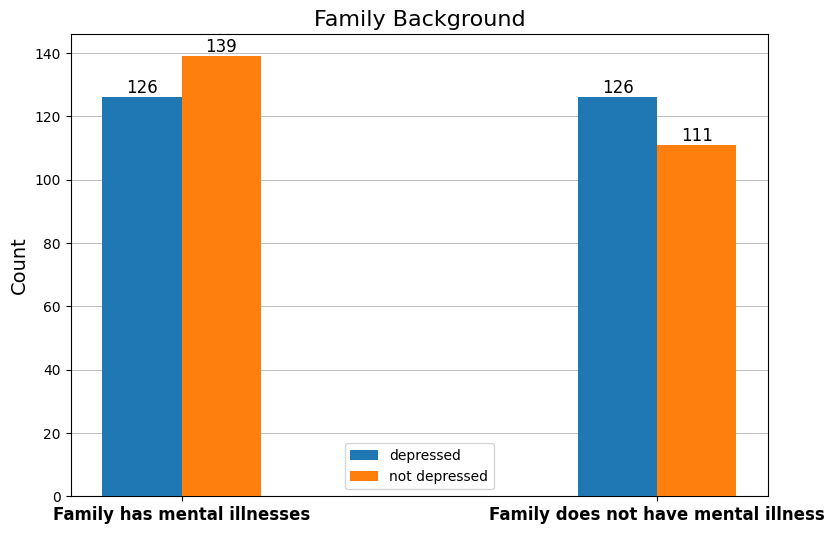

In [236]:
#depressed people w depression bg or no
categories = ["Family has mental illnesses", "Family does not have mental illness"]
bar_width = 0.25
x = np.arange(len(categories)) * 1.5

# Step 1: Filter the data to include only people with depression
depressed_people = df[df['Depression'] == 'Yes']

# Step 2: Count family history within this subset
family_history_counts = depressed_people['Family History of Mental Illness'].value_counts()
print(family_history_counts)

# Set a white background
plt.style.use('default')  # Reset to default style for white background
plt.rcParams['axes.facecolor'] = 'white'  # White background for the plot
plt.rcParams['figure.facecolor'] = 'white'  # White background for the figure

# Create the bar chart
fig,ax = plt.subplots(figsize=(9,6))  # Adjust figure size

# Add grid lines behind the bars
ax.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.7, zorder=0,axis='y')  # zorder=0 ensures grid lines are behind bars

# Create bars with dark blue color (#0A0F24)
bars = ax.bar(x - bar_width/2, family_history_counts.values, width=bar_width, linewidth=2, zorder=5, label="depressed")

# Add annotations
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), 
             ha='center', va='bottom', color='black', fontsize=12)
    
    
# Step 1: Filter the data to include only people with depression
depressed_people = df[df['Depression'] == 'No']

# Step 2: Count family history within this subset
family_history_counts = depressed_people['Family History of Mental Illness'].value_counts()
print(family_history_counts)

# Create bars with dark blue color (#0A0F24)
bars1 = ax.bar(x + bar_width/2, family_history_counts.values, width=bar_width, linewidth=2, zorder=5, label="not depressed")
# Add annotations
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), 
             ha='center', va='bottom', color='black', fontsize=12)
    
    
# Add labels and title
plt.xticks(x, categories, fontsize=12, fontweight='bold', color='black')  # Fix: Set tick labels 
plt.title('Family Background', fontsize=16, color='black')
plt.ylabel('Count', fontsize=14, color='black')
plt.legend()
#save figure
plt.savefig(fname="comparison_of_background_of_those_who_are_depressed.jpg",dpi=300)

# Show the plot
plt.show()

since its 50/50 for the depressed, it is safe to say that the family background does not affect depression

in fact, more people in the non-depressed group has family members with mental illness

Dietary Habits
Unhealthy    106
Moderate      82
Healthy       64
Name: count, dtype: int64
Dietary Habits
Healthy      97
Moderate     90
Unhealthy    63
Name: count, dtype: int64


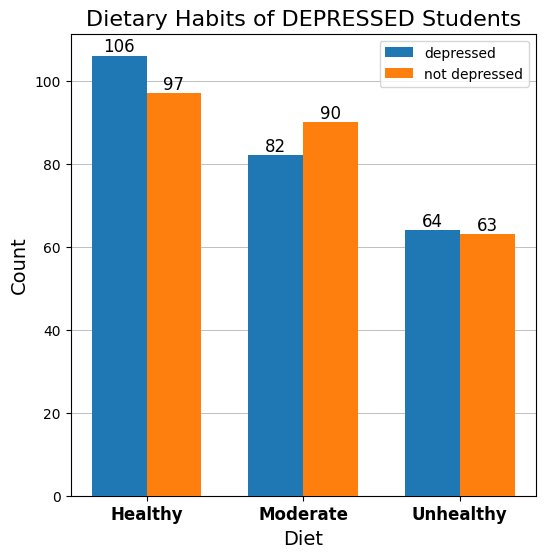

In [231]:
#depressed people's diet compared to normal

categories = ['Healthy', 'Moderate', 'Unhealthy']

# Step 1: Filter the data to include only people with depression
depressed_people = df[df['Depression'] == 'Yes']

# Step 2: Count dietary habits within this subset
diet_counts = depressed_people['Dietary Habits'].value_counts()
print(diet_counts)

# Set a white background
plt.style.use('default')  # Reset to default style for white background
plt.rcParams['axes.facecolor'] = 'white'  # White background for the plot
plt.rcParams['figure.facecolor'] = 'white'  # White background for the figure

# Create the bar chart
fig,ax = plt.subplots(figsize=(6,6))  # Adjust figure size
bar_width = 0.35
x = np.arange(len(categories)) 

# Add grid lines behind the bars
ax.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.7, zorder=0,axis='y')  # zorder=0 ensures grid lines are behind bars

# Create bars with dark blue color (#0A0F24)
bars1 = ax.bar(x - bar_width/2, diet_counts.values, width=bar_width, linewidth=2, zorder=5,label="depressed")
# Add annotations
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), 
             ha='center', va='bottom', color='black', fontsize=12)


# Step 1: Filter the data to include only people with depression
depressed_people = df[df['Depression'] == 'No']

# Step 2: Count dietary habits within this subset
diet_counts = depressed_people['Dietary Habits'].value_counts()
print(diet_counts)

# Create bars with dark blue color (#0A0F24)
bars = ax.bar(x + bar_width/2, diet_counts.values, width=bar_width, linewidth=2, zorder=5,label="not depressed")

# Add annotations
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), 
             ha='center', va='bottom', color='black', fontsize=12)
    
    
# Add labels and title
plt.xticks(x, categories, fontsize=12, fontweight='bold', color='black')  # Fix: Set tick labels 
plt.title('Dietary Habits of DEPRESSED Students', fontsize=16, color='black')
plt.xlabel('Diet', fontsize=14, color='black')
plt.ylabel('Count', fontsize=14, color='black')
plt.legend()

# savefig
plt.savefig('dietary_habits_of_depressed_people.png', dpi=300)

plt.show()

Generally depressed people eat **unhealthy**, but normal people eat **unhealthy** too

Possible cause: they are over 18, they have freedom of choice on food. School is taking alot of their time. So they result to fast foods

# in-depth analysis after ruling out other factors

[252 250]


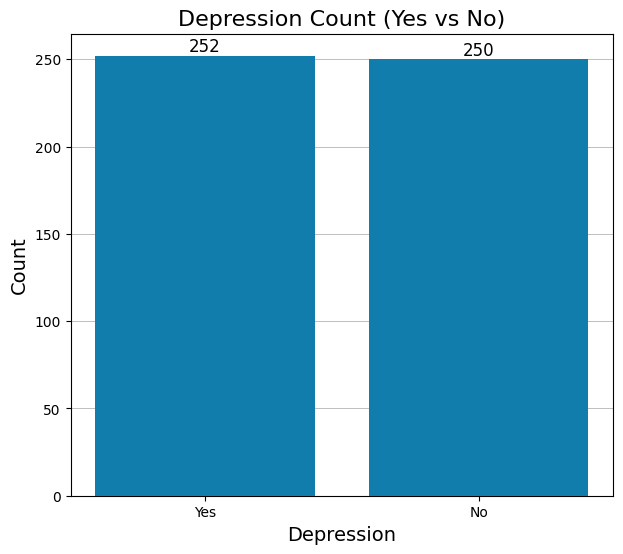

In [232]:
#number of depressed people

import matplotlib.pyplot as plt

# Count the "Yes" and "No" values
depression_counts = df['Depression'].value_counts()

# Set a white background
plt.style.use('default')  # Reset to default style for white background
plt.rcParams['axes.facecolor'] = 'white'  # White background for the plot
plt.rcParams['figure.facecolor'] = 'white'  # White background for the figure

# Create the bar chart
fig,ax = plt.subplots(figsize=(7, 6))  # Adjust figure size

# Add grid lines behind the bars
ax.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.7, zorder=0,axis='y')  # zorder=0 ensures grid lines are behind bars

# Create bars with dark blue color (#0A0F24)
print(depression_counts.values)
bars = ax.bar(depression_counts.index, depression_counts.values, color='#107dac', linewidth=2, zorder=5)

# Add annotations
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), 
             ha='center', va='bottom', color='black', fontsize=12, zorder=10)  # zorder=10 ensures annotations are on top

# Add labels and title
plt.title('Depression Count (Yes vs No)', fontsize=16, color='black')
plt.xlabel('Depression', fontsize=14, color='black')
plt.ylabel('Count', fontsize=14, color='black')

#save figure
plt.savefig(fname="Depressed_people.jpg",dpi=300)

plt.show()

more people are depressed

saved


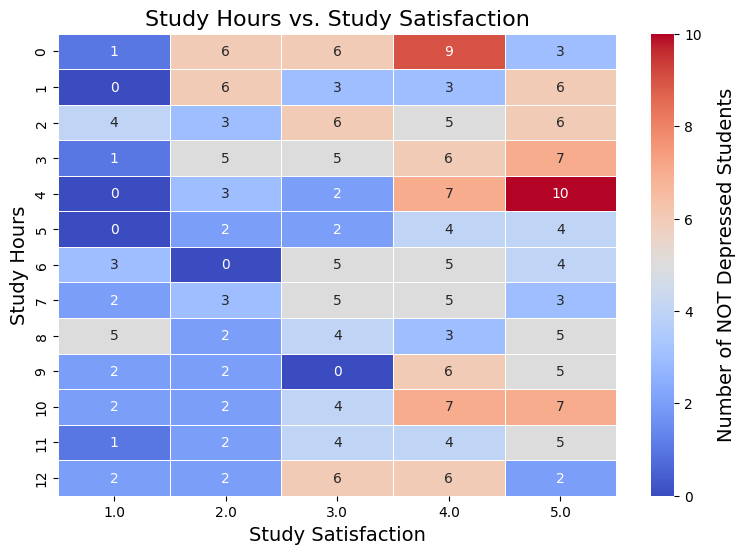

In [233]:
#study hours to study satisfaction to students

# Ensure the y-axis (Study Hours) ranges from 0 to 12
study_hours_range = range(0, 13)
study_satisfaction_range = sorted(df["Study Satisfaction"].unique())

# Create a pivot table counting only depressed students
depressed_counts = df[df["Depression"]=="No"].pivot_table(
    index="Study Hours", columns="Study Satisfaction", aggfunc="size", fill_value=0
)

# Reindex to ensure all Study Hours from 0-12 are included
depressed_counts = depressed_counts.reindex(study_hours_range, fill_value=0)

# Plot heatmap
plt.subplots(figsize=(9, 6))
sns.heatmap(depressed_counts, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)

# Labels and title
plt.xlabel("Study Satisfaction",fontsize=14)
plt.ylabel("Study Hours",fontsize=14)
plt.title("Study Hours vs. Study Satisfaction",fontsize=16)
plt.text(len(study_satisfaction_range) + 0.9, len(study_hours_range) / 2, 
        "Number of NOT Depressed Students", rotation=90, va="center", fontsize=14, color="black")

plt.savefig(fname="Study_satis_to_hours_of_depressed(1).jpg",dpi=300)
print("saved")

# Show plot
plt.show()

saved


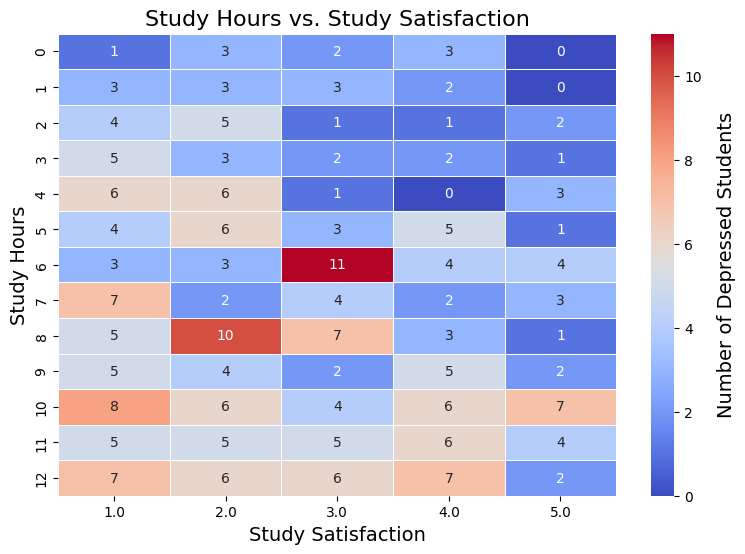

In [237]:
#study hours to study satisfaction to depression

# Ensure the y-axis (Study Hours) ranges from 0 to 12
study_hours_range = range(0, 13)
study_satisfaction_range = sorted(df["Study Satisfaction"].unique())

# Create a pivot table counting only depressed students
depressed_counts = df[df["Depression"] == "Yes"].pivot_table(
    index="Study Hours", columns="Study Satisfaction", aggfunc="size", fill_value=0
)

# Reindex to ensure all Study Hours from 0-12 are included
depressed_counts = depressed_counts.reindex(study_hours_range, fill_value=0)

# Plot heatmap
plt.subplots(figsize=(9, 6))
sns.heatmap(depressed_counts, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)

# Labels and title
plt.xlabel("Study Satisfaction",fontsize=14)
plt.ylabel("Study Hours",fontsize=14)
plt.title("Study Hours vs. Study Satisfaction",fontsize=16)
plt.text(len(study_satisfaction_range) + 0.9, len(study_hours_range) / 2, 
        "Number of Depressed Students", rotation=90, va="center", fontsize=14, color="black")

plt.savefig(fname="Study_satis_to_hours_of_depressed(2).jpg",dpi=300)
print("saved")

# Show plot
plt.show()


For normal students (fig1), their study hours are generally lower. Students tend to migrate more to the right, which means that they are more satisfied with their grades.

For depressed students (fig2), their study hours are way higher. Students also migrate to the bottom left. This means that they are less satisfied with their score even though they studied far more than normal students; 

concl. **School is putting too much pressure for them.**

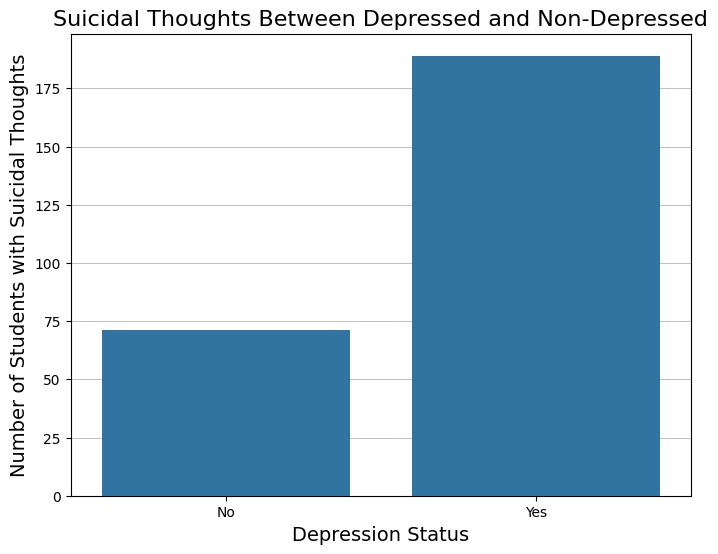

In [235]:
#comparison of suicidal thoughts

copy_df=df
copy_df["Have you ever had suicidal thoughts ?"] = copy_df["Have you ever had suicidal thoughts ?"].apply(lambda x: 1 if str(x).strip().lower() == "yes" else 0)

# Count students with suicidal thoughts in each depression group
suicidal_counts = copy_df.groupby("Depression")["Have you ever had suicidal thoughts ?"].sum()

# Create bar chart
plt.figure(figsize=(8, 6))
# Set a white background
plt.style.use('default')  # Reset to default style for white background
plt.rcParams['axes.facecolor'] = 'white'  # White background for the plot
plt.rcParams['figure.facecolor'] = 'white'  # White background for the figure

# Add grid lines behind the bars
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.7, zorder=0,axis='y') 


sns.barplot(x=suicidal_counts.index, y=suicidal_counts.values, zorder=10)

# Add labels and title
plt.title("Suicidal Thoughts Between Depressed and Non-Depressed", fontsize=16, color='black')
plt.xlabel("Depression Status", fontsize=14, color='black')
plt.ylabel("Number of Students with Suicidal Thoughts", fontsize=14, color='black')

#save
plt.savefig("comparison_of_suicidal_thoughts.jpg",dpi=300)
# Show plot
plt.show()
